<img src="../../img/logo-bdc.png" align="right" width="64" />

# <span style="color:#336699">Calculating Image Difference on images obtained through STAC</span>
<hr style="border:2px solid #0077b9;">

If you haven't installed the [STAC client for Python](https://github.com/brazil-data-cube/stac.py), install it with `pip`:

In [ ]:
!pip install stac.py

For more information on [STAC client for Python](https://github.com/brazil-data-cube/stac.py), see the introductory Jupyter Notebook about the [SpatioTemporal Asset Catalog (STAC)](./stac-introduction.ipynb).

# 1. Load the following Libraries
<hr style="border:1px solid #0077b9;">

In [2]:
import numpy
import rasterio
import stac

from math import floor, ceil
from matplotlib import pyplot as plt
from pyproj import Proj
from rasterio.windows import Window

def longlat2window(lon, lat, dataset):
    """
    Args:
        lon (tuple): Tuple of min and max lon
        lat (tuple): Tuple of min and max lat
        dataset: Rasterio dataset

    Returns:
        rasterio.windows.Window
    """
    p = Proj(dataset.crs)
    t = dataset.transform
    xmin, ymin = p(lon[0], lat[0])
    xmax, ymax = p(lon[1], lat[1])
    col_min, row_min = ~t * (xmin, ymin)
    col_max, row_max = ~t * (xmax, ymax)
    return Window.from_slices(rows=(floor(row_max), ceil(row_min)),
                              cols=(floor(col_min), ceil(col_max)))

# 2. Set the service and search for images
<hr style="border:1px solid #0077b9;">

In [3]:
st = stac.STAC('http://brazildatacube.dpi.inpe.br/stac/')

In [4]:
my_search = st.search({'collections':['CB4_64_16D_STK-1'], 
                       'bbox':'-46.62597656250001,-13.19716452328198,-45.03570556640626,-12.297068292853805',
                       'datetime':'2018-08-01/2019-02-28', 
                       'limit':30})
my_search

name,common_name,min,max,nodata,scale,data_type
CLEAROB,ClearOb,0.0,255.0,0.0,0.0001,uint8
CMASK,quality,0.0,4.0,255.0,0.0001,uint8
PROVENANCE,Provenance,1.0,366.0,-1.0,0.0001,int16
TOTALOB,TotalOb,0.0,255.0,0.0,0.0001,uint8
EVI,evi,-10000.0,10000.0,-9999.0,0.0001,int16
NDVI,ndvi,-10000.0,10000.0,-9999.0,0.0001,int16
BAND13,blue,0.0,10000.0,-9999.0,0.0001,int16
BAND14,green,0.0,10000.0,-9999.0,0.0001,int16
BAND15,red,0.0,10000.0,-9999.0,0.0001,int16
BAND16,nir,0.0,10000.0,-9999.0,0.0001,int16


In [5]:
nir_band_info = my_search['features'][0]['properties']['eo:bands'][3]
nir_band_info

{'name': 'TOTALOB',
 'common_name': 'TotalOb',
 'description': None,
 'min': 0.0,
 'max': 255.0,
 'nodata': 0.0,
 'scale': 0.0001,
 'center_wavelength': None,
 'full_width_half_max': None,
 'data_type': 'uint8'}

In [6]:
first_date_nir_url = my_search['features'][1]['assets']['BAND16']['href']
first_date_nir_url

'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/CB4_64_16D_STK/v001/022024/2019-02-02_2019-02-17/CB4_64_16D_STK_v001_022024_2019-02-02_2019-02-17_BAND16.tif'

In [7]:
last_date_nir_url = my_search['features'][13]['assets']['BAND16']['href']
last_date_nir_url

'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/CB4_64_16D_STK/v001/022024/2018-07-28_2018-08-12/CB4_64_16D_STK_v001_022024_2018-07-28_2018-08-12_BAND16.tif'

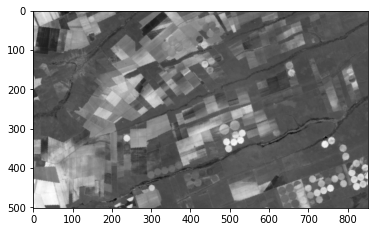

In [8]:
w = -45.90
n = -12.6
e = -45.40
s = -12.90

with rasterio.open(first_date_nir_url) as dataset:
    first_date_nir = dataset.read(1, window = longlat2window((w,e), (s,n), dataset))
    plt.imshow(first_date_nir, cmap='gray')
    plt.show()

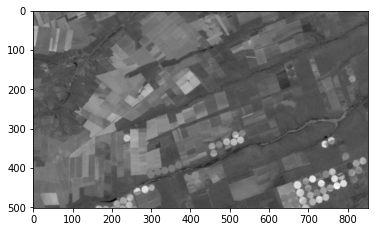

In [9]:
with rasterio.open(last_date_nir_url) as dataset:
    last_date_nir = dataset.read(1, window = longlat2window((w,e), (s,n), dataset))
    plt.imshow(last_date_nir, cmap='gray')
    plt.show()

# 3. Calculate image difference
<hr style="border:1px solid #0077b9;">

In [10]:
nir_difference = last_date_nir - first_date_nir
nir_difference

array([[ -763, -1525, -1238, ...,   -92,    31,   -27],
       [ -216, -1495, -1398, ...,   -82,   -60,   -30],
       [ -179, -1261, -1498, ...,     3,   -79,   -93],
       ...,
       [-3378, -3355, -3420, ...,   161,   217,   257],
       [-3356, -3384, -3408, ...,   201,   269,   295],
       [-3284, -3298, -3285, ...,   216,   273,   248]], dtype=int16)

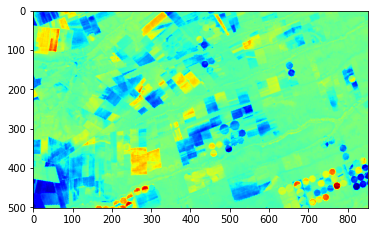

In [11]:
plt.imshow(nir_difference, cmap='jet')